## Depresyon Durum Tahmini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prefix = 'C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/'
import os
for dirname, _, filenames in os.walk(prefix):
    for filename in filenames:
        print(os.path.join(dirname, filename))
CONTROL_DATA_PATH = 'C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/control/control_1.csv'
CONDITION_DATA_PATH = 'C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition/condition_1.csv'

C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/Depresyon Durum Tahmini.ipynb
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/scores.csv
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/.ipynb_checkpoints\Depresyon Durum Tahmini-checkpoint.ipynb
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition\condition_1.csv
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition\condition_10.csv
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition\condition_11.csv
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition\condition_12.csv
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition\condition_13.csv
C:/Users/lenovo/Desktop/DSPG Veri Paylaşımı/Project-2 Depresyon Durum Tahmini/data/condition\conditio

In [2]:
df = pd.read_csv('scores.csv')
df.head()
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 55 rows and 12 columns


In [3]:
"""

1. Number: unique identifier for patient
2. Days: number of days observed
3. Gender: 1 female, 2 male
4. Age: age range of patient
5. Afftype: 1 bipolar second, 2 unipolar depressive, bipolar first
6. Melanch: 1 melancholia, 2 no melancholia
7. Inpatient: 1 inpatient (in hospital), 2 outpatient (ambulatory care)
8. Edu: education grouped in years
9. Marriage: 1 married/cohabiting, 2 single
10. Work: 1 working/studing, 2 unemployed/ sick leave/ pension
11. madrs1: MADRS score when measurement started
12. madrs2: MADRS score when measurement stopped

"""

'\n\n1. Number: unique identifier for patient\n2. Days: number of days observed\n3. Gender: 1 female, 2 male\n4. Age: age range of patient\n5. Afftype: 1 bipolar second, 2 unipolar depressive, bipolar first\n6. Melanch: 1 melancholia, 2 no melancholia\n7. Inpatient: 1 inpatient (in hospital), 2 outpatient (ambulatory care)\n8. Edu: education grouped in years\n9. Marriage: 1 married/cohabiting, 2 single\n10. Work: 1 working/studing, 2 unemployed/ sick leave/ pension\n11. madrs1: MADRS score when measurement started\n12. madrs2: MADRS score when measurement stopped\n\n'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [5]:
df.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


In [6]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

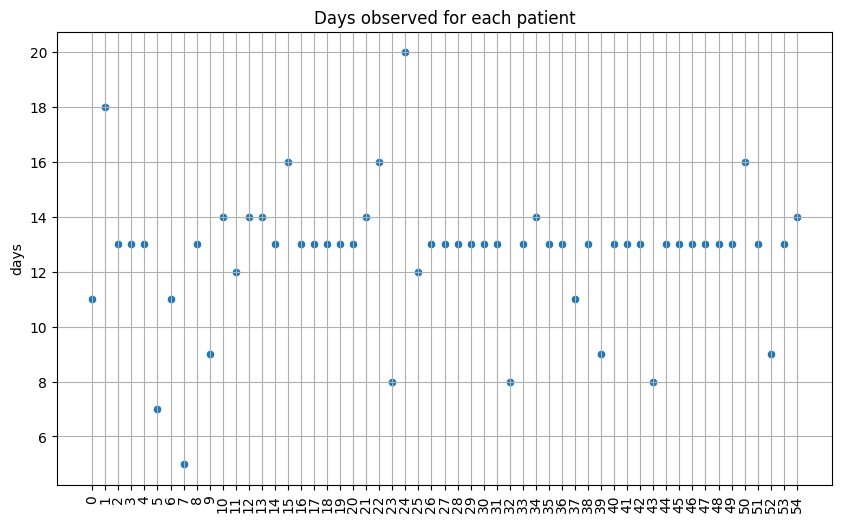

In [7]:
plt.figure(figsize= (10, 6), dpi = 100)
plt.title('Days observed for each patient')
sns.scatterplot(data = df, x=range(55), y = 'days')
plt.xticks(range(55), rotation = 90)
plt.grid()
plt.show()
plt.close()

In [8]:
for i in range(1, len(df['number']) + 1):
    df.loc[i - 1, 'id'] = int(i)

In [9]:
df.loc[df['id'] < 24, 'group'] = 0
df.loc[df['id'] > 23, 'group'] = 1

df.tail(3)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group
52,control_30,9,2,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,53.0,1.0
53,control_31,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,54.0,1.0
54,control_32,14,2,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,55.0,1.0


In [10]:
control_1 = pd.read_csv(CONTROL_DATA_PATH)
condition_1 = pd.read_csv(CONDITION_DATA_PATH)
print(f'control_1.shape: {control_1.shape}')
print(f'condition_1.shape: {condition_1.shape}')

control_1.shape: (51611, 3)
condition_1.shape: (23244, 3)


In [11]:
control_1.head()

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293


In [12]:
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [13]:
condition_1.describe()

,activity
count,23244.000000
mean,146.948030
std,294.592424
min,0.000000
25%,0.000000
50%,9.000000
75%,172.000000
max,3526.000000


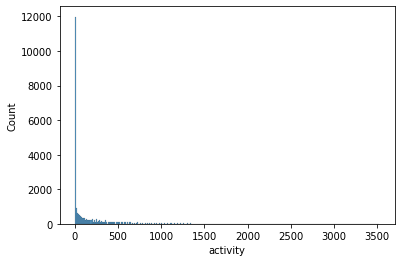

In [14]:
sns.histplot(x='activity', data=condition_1)
plt.show()

In [15]:
condition_1['activity'].skew()

3.8823677090908344

In [16]:
df_cond = df[df['number'].str.contains('condition')]
df_cont = df[df['number'].str.contains('control')]
df_cont = df_cont[['number','days', 'gender', 'age']]

sample_df = pd.merge(df_cond, df_cont, how='inner', left_on=['days','gender','age'], right_on = ['days','gender','age'],
          suffixes=('_cond', '_cont'))

col = sample_df.pop("number_cont")
sample_df.insert(0, col.name, col)

sample_df

,number_cont,number_cond,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group
0,control_11,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,3.0,0.0
1,control_27,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,5.0,0.0
2,control_29,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,5.0,0.0
3,control_27,condition_19,13,2,50-54,2.0,2.0,1.0,16-20,2.0,2.0,26.0,21.0,19.0,0.0
4,control_29,condition_19,13,2,50-54,2.0,2.0,1.0,16-20,2.0,2.0,26.0,21.0,19.0,0.0
5,control_12,condition_14,14,1,60-64,1.0,2.0,2.0,6-10,2.0,2.0,28.0,19.0,14.0,0.0
6,control_13,condition_17,13,1,50-54,1.0,2.0,2.0,6-10,1.0,2.0,17.0,15.0,17.0,0.0
7,control_14,condition_17,13,1,50-54,1.0,2.0,2.0,6-10,1.0,2.0,17.0,15.0,17.0,0.0
8,control_19,condition_17,13,1,50-54,1.0,2.0,2.0,6-10,1.0,2.0,17.0,15.0,17.0,0.0
9,control_8,condition_18,13,2,40-44,3.0,2.0,2.0,11-15,2.0,2.0,18.0,15.0,18.0,0.0


In [17]:
import datetime as dt
from scipy import stats
nrow_count = len(sample_df)

def load_and_prep(path, col, i):
    df = pd.read_csv(f'{prefix}/{path}/{sample_df.iloc[i][col]}.csv',
                     parse_dates=['date','timestamp'])   
    df = df[df.date < (min(df.date) + dt.timedelta(days=int(sample_df.iloc[i]["days"])))]
    df['minute_index'] = df.index
    
    return(df)

activity_list = ['activity_cond', 'activity_cont']

data = []

for i in range(nrow_count):
    cond_plot = load_and_prep('condition','number_cond',i)
    cont_plot = load_and_prep('control','number_cont',i)
    
    new_df = pd.merge(cond_plot, cont_plot, how='inner',
                      left_on=['minute_index'], right_on = ['minute_index'],
                      suffixes=('_cond', '_cont'))
    
    new_df = new_df[['timestamp_cont','timestamp_cond',
                     'minute_index', 'activity_cond', 'activity_cont']]
    
    for activity in activity_list:
        new_df = new_df[(np.abs(stats.zscore(new_df[activity])) < 3)]
    
    data.append(new_df)

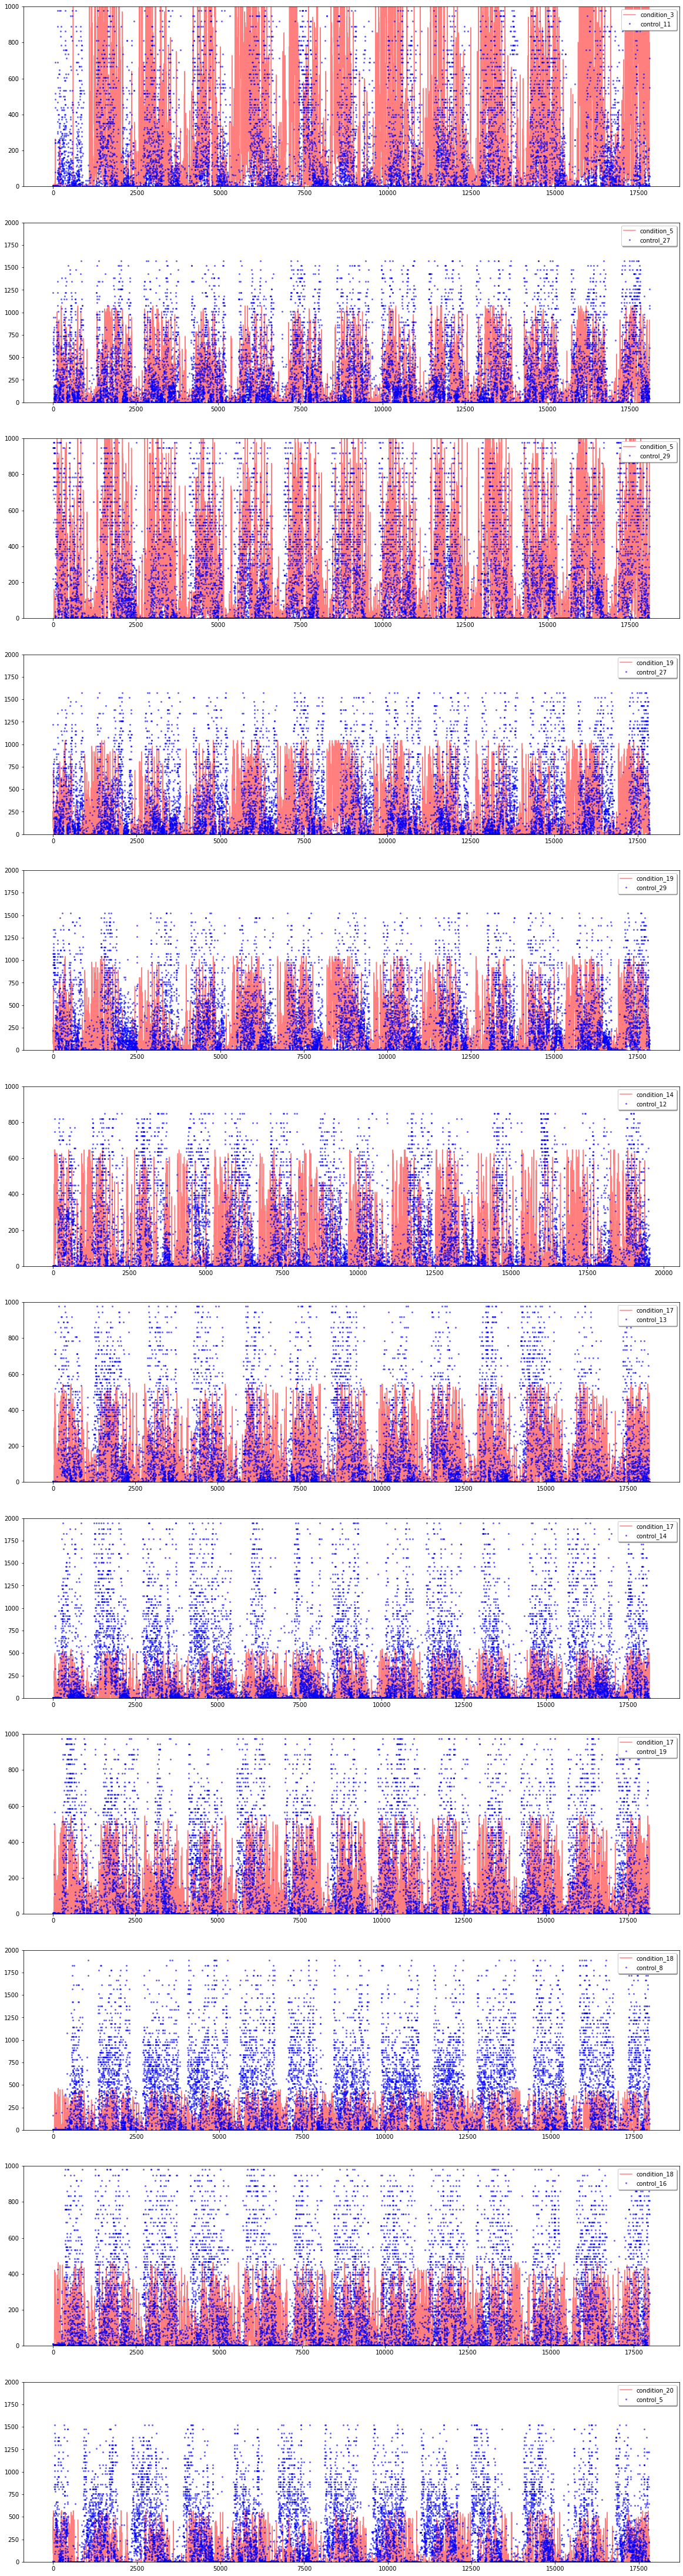

In [18]:
_, ax1 = plt.subplots(nrow_count,1, figsize=(20, 80))

for i,_ in enumerate(data):

    ax1[i].plot(data[i].minute_index, data[i].activity_cond, color='r', alpha = 0.5)
    ax1[i].plot(data[i].minute_index, data[i].activity_cont, color='b',
                marker='o', markersize=2,linestyle = '', alpha = 0.5)

    ax1[i].legend((f'{sample_df.iloc[i]["number_cond"]}',
                   f'{sample_df.iloc[i]["number_cont"]}'),
                  loc='upper right', shadow=True)
    
    y_max =round(max([data[i].activity_cond.max(),data[i].activity_cont.max()]),-3)
    
    ax1[i].set_ylim(0, y_max)

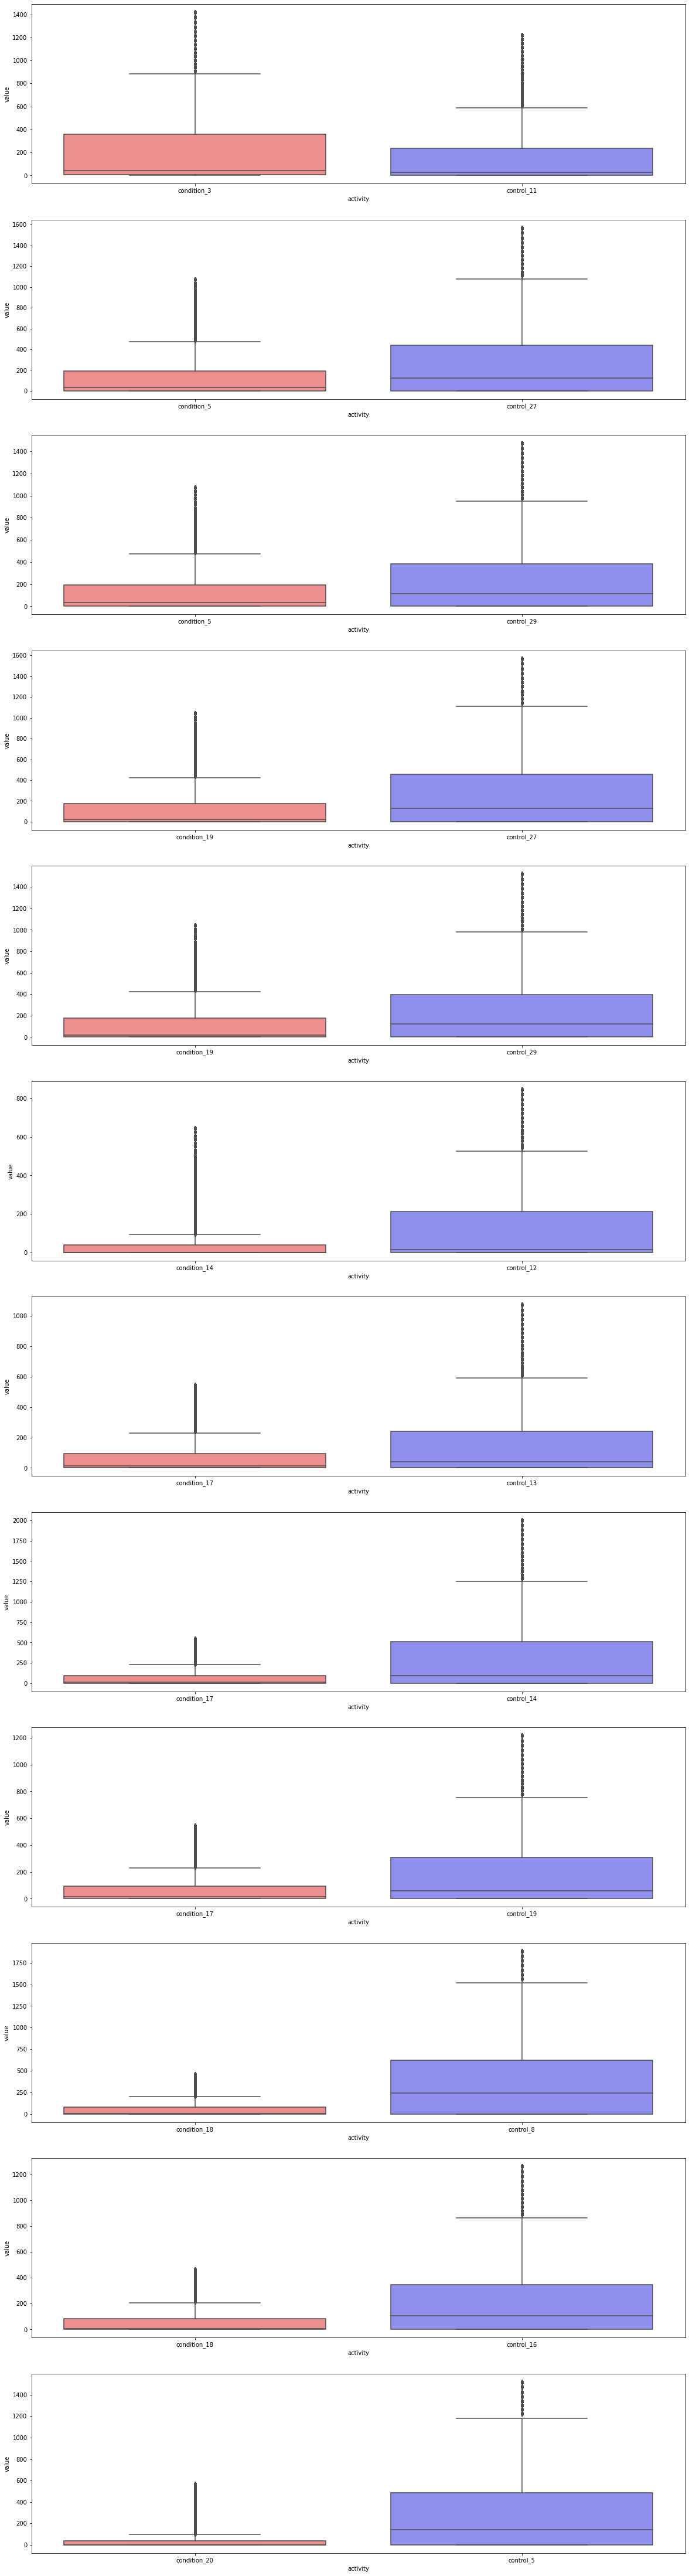

In [19]:
_, ax2 = plt.subplots(nrow_count,1, figsize=(20, 80))

for i, _ in enumerate(data):
    temp = data[i][["minute_index", "activity_cond", "activity_cont"]]
    
    temp2 = temp.rename(columns = {"activity_cond": f'{sample_df.iloc[i]["number_cond"]}',
                 "activity_cont": f'{sample_df.iloc[i]["number_cont"]}'})
    
    temp2 = pd.melt(temp2, id_vars=['minute_index'], var_name='activity')
    
    my_pal = {f'{sample_df.iloc[i]["number_cond"]}': "r",
              f'{sample_df.iloc[i]["number_cont"]}': "b"}
    
    sns.boxplot(x='activity', y='value', data=temp2,  orient='v' , ax=ax2[i], palette=my_pal)
    
    for patch in ax2[i].artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .5))
        
